## Corrección Taller Pre Evaluación


**Estudiante:** Jonathan D. Sefla M.
**Ciclo:** 7mo A

**Usted es un analista de datos y tendrá que realizar las siguientes tareas:**

1. Ingrese a a página de datos abiertos de Ecuador.

2. Diríjase a la sección seguridad y defensa.

3. Descargue el data set de personas desaparecidas.

4. Revise el archivo antes de realizar la limpieza para que pueda entender que tipos de datos contiene.

5. Realice la limpieza de datos correspondiente para que pueda ser leido en python.

6. Responda a las siguintes preguntas:

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [233]:
datos = pd.read_csv('mdg_personasdesaparecidas_pm_2023_enero_marzo.csv', encoding='latin-1', sep=';', na_values = 'SIN_DATO')

In [234]:
datos.head(10)

,Provincia,Latitud,Longitud,Edad Aprox.,Sexo,Motivo Desaparción,Motivo Desaparción Obs.,Fecha Desaparición,Situación Actual,Fecha Localización
0,PICHINCHA,"-0,2188216","-78,5135489",17,HOMBRE,NaN,NaN,24/1/2023,DESAPARECIDO,NaN
1,PICHINCHA,"-0,26909023","-78,54001523",17,MUJER,PROBLEMAS FAMILIARES,PROBLEMAS SENTIMENTALES,2/2/2023,ENCONTRADO,7/2/2023
2,SANTO DOMINGO DE LOS TSACHILAS,"0,0091672","-79,391605",39,HOMBRE,NaN,NaN,1/2/2023,DESAPARECIDO,NaN
3,PICHINCHA,"-0,17504166","-78,47478184",14,MUJER,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,16/3/2023,ENCONTRADO,17/3/2023
4,ESMERALDAS,"0,9873857","-79,65649069",28,HOMBRE,NaN,NaN,7/2/2023,DESAPARECIDO,NaN
5,SANTO DOMINGO DE LOS TSACHILAS,"-0,2683217","-79,1978398",42,HOMBRE,NaN,NaN,13/3/2023,DESAPARECIDO,NaN
6,GUAYAS,"-2,1258684","-79,9227452",16,MUJER,PROBLEMAS FAMILIARES,PROBLEMAS SENTIMENTALES,2/3/2023,ENCONTRADO,20/3/2023
7,GUAYAS,"-2,1225293","-80,000135",28,HOMBRE,NaN,NaN,15/3/2023,DESAPARECIDO,NaN
8,CHIMBORAZO,"-1,6604411","-78,6563855",12,HOMBRE,PROBLEMAS FAMILIARES,MALTRATO FISICO,9/2/2023,ENCONTRADO,9/2/2023
9,GUAYAS,"-2,2402791","-79,9220686",2,MUJER,NaN,NaN,5/2/2023,DESAPARECIDO,NaN


In [235]:
datos.columns

Index(['Provincia', 'Latitud', 'Longitud', 'Edad Aprox.', 'Sexo',
       'Motivo Desaparción', 'Motivo Desaparción Obs.', 'Fecha Desaparición',
       'Situación Actual', 'Fecha Localización'],
      dtype='object')

In [236]:
datos.isnull().sum()

Provincia                    0
Latitud                      0
Longitud                     0
Edad Aprox.                  0
Sexo                         0
Motivo Desaparción         286
Motivo Desaparción Obs.    286
Fecha Desaparición           0
Situación Actual             0
Fecha Localización         286
dtype: int64

In [237]:
#para un valor especifico
# datos['Motivo Desaparción'].fillna('Hola', inplace=True)

# para reemplazar con la moda
#datos['Motivo Desaparción'].fillna(datos['Motivo Desaparción'].mode(), inplace=True)

#tambien se pueden eliminar las filas con valores vacíos

In [238]:
from sklearn.impute import SimpleImputer
import numpy as np

# "Motivo Desaparción"
# Construimos el modelo
imputer = SimpleImputer(strategy="most_frequent")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(datos[["Motivo Desaparción"]])

datos["Motivo Desaparción"] = imputer.transform(datos[["Motivo Desaparción"]])


# "Motivo Desaparción Obs."
# Construimos el modelo
imputer = SimpleImputer(strategy="most_frequent")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(datos[["Motivo Desaparción Obs."]])

datos["Motivo Desaparción Obs."] = imputer.transform(datos[["Motivo Desaparción Obs."]])


# "Fecha Localización"
# Construimos el modelo
imputer = SimpleImputer(strategy="most_frequent")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(datos[["Fecha Localización"]])

datos["Fecha Localización"] = imputer.transform(datos[["Fecha Localización"]])


datosL=datos
datosL

,Provincia,Latitud,Longitud,Edad Aprox.,Sexo,Motivo Desaparción,Motivo Desaparción Obs.,Fecha Desaparición,Situación Actual,Fecha Localización
0,PICHINCHA,"-0,2188216","-78,5135489",17,HOMBRE,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,24/1/2023,DESAPARECIDO,5/2/2023
1,PICHINCHA,"-0,26909023","-78,54001523",17,MUJER,PROBLEMAS FAMILIARES,PROBLEMAS SENTIMENTALES,2/2/2023,ENCONTRADO,7/2/2023
2,SANTO DOMINGO DE LOS TSACHILAS,"0,0091672","-79,391605",39,HOMBRE,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,1/2/2023,DESAPARECIDO,5/2/2023
3,PICHINCHA,"-0,17504166","-78,47478184",14,MUJER,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,16/3/2023,ENCONTRADO,17/3/2023
4,ESMERALDAS,"0,9873857","-79,65649069",28,HOMBRE,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,7/2/2023,DESAPARECIDO,5/2/2023
...,...,...,...,...,...,...,...,...,...,...
1887,SANTO DOMINGO DE LOS TSACHILAS,"-0,2477616","-79,1485374",14,MUJER,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,31/1/2023,DESAPARECIDO,5/2/2023
1888,AZUAY,"-3,38988084","-79,08271046",15,MUJER,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,30/1/2023,DESAPARECIDO,5/2/2023
1889,CHIMBORAZO,"-1,908452","-78,641068",22,HOMBRE,PROBLEMAS SOCIALES,INFLUENCIA DE AMISTADES,23/1/2023,ENCONTRADO,14/4/2023
1890,GUAYAS,"-2,0721549","-79,9345141",32,HOMBRE,PROBLEMAS FAMILIARES,FAMILIA DISFUNSIONAL,28/1/2023,ENCONTRADO,4/3/2023


In [239]:
## PREGUNTAS

**2) Presente los datos de los desaparecidos tomando en cuenta sus coordenas para obtener un gráfico como el siguiente**

In [240]:
# Latitud	Longitud

datos.columns

Index(['Provincia', 'Latitud', 'Longitud', 'Edad Aprox.', 'Sexo',
       'Motivo Desaparción', 'Motivo Desaparción Obs.', 'Fecha Desaparición',
       'Situación Actual', 'Fecha Localización'],
      dtype='object')

In [241]:
len(datos)

1892

In [242]:
#plt.plot(datos['Longitud'], datos['Latitud'], 'ro')
#plt.show()

# Reemplazo del separador "," por "."
datos['Longitud'] = datos['Longitud'].str.replace(',', '.')
datos['Latitud'] = datos['Latitud'].str.replace(',', '.')

# Convertir longitud y latitud a tipo float
datos['Longitud'] = datos['Longitud'].astype(float)
datos['Latitud'] = datos['Latitud'].astype(float)


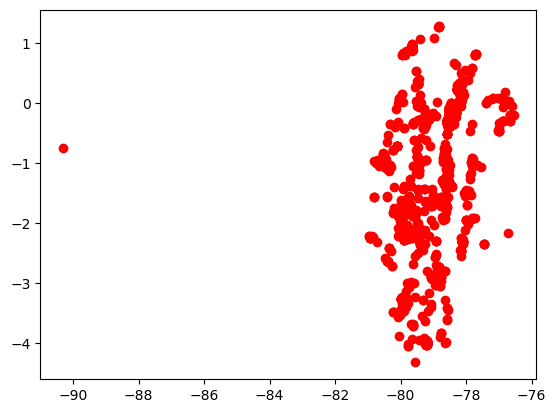

In [243]:
plt.plot(datos['Longitud'], datos['Latitud'], 'ro')
plt.show()

In [244]:
motivos = np.unique(datos['Motivo Desaparción'])

motivos_levels = dict(zip(motivos, range(len(motivos))))
motivos_levels


{'DISCAPACIDADES Y ENFERMEDADES': 0,
 'EXTRAVIADA': 1,
 'FALLECIDO': 2,
 'FISCALÍA': 3,
 'PERDIDO': 4,
 'PROBLEMA ECÓNOMICOS': 5,
 'PROBLEMAS ACADÉMICOS': 6,
 'PROBLEMAS FAMILIARES': 7,
 'PROBLEMAS PSICOLÓGICOS': 8,
 'PROBLEMAS SOCIALES': 9}

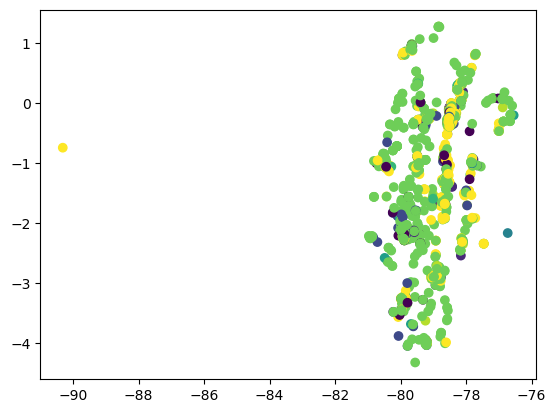

In [245]:
datos['PdMotivoCode'] = datos['Motivo Desaparción'].apply(lambda row: motivos_levels[row])

plt.scatter(datos['Longitud'], datos['Latitud'], c=datos['PdMotivoCode'])
plt.show()

**3) Grafique en un mapa los puntos donde las personas han desaparecido en Ecuador**

In [246]:
from matplotlib import colors

motivos = np.unique(datos['Motivo Desaparción'])
print(list(colors.cnames.values())[0:len(motivos)])



['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [247]:
color_dict = dict(zip(motivos, list(colors.cnames.values())[0:-1:len(motivos)]))  
color_dict

{'DISCAPACIDADES Y ENFERMEDADES': '#F0F8FF',
 'EXTRAVIADA': '#8A2BE2',
 'FALLECIDO': '#00FFFF',
 'FISCALÍA': '#FF8C00',
 'PERDIDO': '#FF1493',
 'PROBLEMA ECÓNOMICOS': '#F8F8FF',
 'PROBLEMAS ACADÉMICOS': '#4B0082',
 'PROBLEMAS FAMILIARES': '#FAFAD2',
 'PROBLEMAS PSICOLÓGICOS': '#B0C4DE',
 'PROBLEMAS SOCIALES': '#9370DB'}

In [248]:
#Create map
map_osm = folium.Map(location=[datos['Latitud'].mean(), datos['Longitud'].mean()], zoom_start = 6)
plotEvery = 50
obs = list(zip(datos['Latitud'], datos['Longitud'], datos['Motivo Desaparción']))

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)


In [249]:
map_osm

## Parte 2

**1) Realice un balance de los datos tomando como variable clase la columna "Motivo Desaparición", adicionalmente elimine las últimas 4 columnas del data set ya que no representan información importante.**

In [250]:
datosNew = datos.drop(['Motivo Desaparción Obs.', 'Fecha Desaparición', 
            'Situación Actual', 'Fecha Localización', 'PdMotivoCode'], axis=1)

In [251]:
datosNew

,Provincia,Latitud,Longitud,Edad Aprox.,Sexo,Motivo Desaparción
0,PICHINCHA,-0.218822,-78.513549,17,HOMBRE,PROBLEMAS FAMILIARES
1,PICHINCHA,-0.269090,-78.540015,17,MUJER,PROBLEMAS FAMILIARES
2,SANTO DOMINGO DE LOS TSACHILAS,0.009167,-79.391605,39,HOMBRE,PROBLEMAS FAMILIARES
3,PICHINCHA,-0.175042,-78.474782,14,MUJER,PROBLEMAS SOCIALES
4,ESMERALDAS,0.987386,-79.656491,28,HOMBRE,PROBLEMAS FAMILIARES
...,...,...,...,...,...,...
1887,SANTO DOMINGO DE LOS TSACHILAS,-0.247762,-79.148537,14,MUJER,PROBLEMAS FAMILIARES
1888,AZUAY,-3.389881,-79.082710,15,MUJER,PROBLEMAS FAMILIARES
1889,CHIMBORAZO,-1.908452,-78.641068,22,HOMBRE,PROBLEMAS SOCIALES
1890,GUAYAS,-2.072155,-79.934514,32,HOMBRE,PROBLEMAS FAMILIARES


**2) Analice que otras columnas no serian necesarias para realizar un sobremuestreo de clases.**

In [252]:
datosNew.drop(['Longitud', 'Latitud'], axis=1, inplace=True)

In [253]:
datosNew

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción
0,PICHINCHA,17,HOMBRE,PROBLEMAS FAMILIARES
1,PICHINCHA,17,MUJER,PROBLEMAS FAMILIARES
2,SANTO DOMINGO DE LOS TSACHILAS,39,HOMBRE,PROBLEMAS FAMILIARES
3,PICHINCHA,14,MUJER,PROBLEMAS SOCIALES
4,ESMERALDAS,28,HOMBRE,PROBLEMAS FAMILIARES
...,...,...,...,...
1887,SANTO DOMINGO DE LOS TSACHILAS,14,MUJER,PROBLEMAS FAMILIARES
1888,AZUAY,15,MUJER,PROBLEMAS FAMILIARES
1889,CHIMBORAZO,22,HOMBRE,PROBLEMAS SOCIALES
1890,GUAYAS,32,HOMBRE,PROBLEMAS FAMILIARES


**3) Realice el sobremuestreo de clases utilizando SMOTE.**

In [254]:
datosNew['Provincia'].unique()

array(['PICHINCHA', 'SANTO DOMINGO DE LOS TSACHILAS', 'ESMERALDAS',
       'GUAYAS', 'CHIMBORAZO', 'IMBABURA', 'MANABI', 'AZUAY', 'CARCHI',
       'LOS RIOS', 'TUNGURAHUA', 'SUCUMBIOS', 'EL ORO', 'ORELLANA',
       'NAPO', 'SANTA ELENA', 'LOJA', 'CAÑAR', 'MORONA SANTIAGO',
       'COTOPAXI', 'PASTAZA', 'BOLIVAR', 'ZAMORA CHINCHIPE',
       'ZONA NO DELIMITADA', 'GALAPAGOS'], dtype=object)

In [255]:
len(datosNew['Provincia'].unique())

25

In [256]:
pro = np.unique(datosNew['Provincia'])

pro_levels = dict(zip(pro, range(len(pro))))
pro_levels

se = np.unique(datosNew['Sexo'])

se_levels = dict(zip(se, range(len(se))))
se_levels

md = np.unique(datosNew['Motivo Desaparción'])

md_levels = dict(zip(md, range(len(md))))
md_levels

{'DISCAPACIDADES Y ENFERMEDADES': 0,
 'EXTRAVIADA': 1,
 'FALLECIDO': 2,
 'FISCALÍA': 3,
 'PERDIDO': 4,
 'PROBLEMA ECÓNOMICOS': 5,
 'PROBLEMAS ACADÉMICOS': 6,
 'PROBLEMAS FAMILIARES': 7,
 'PROBLEMAS PSICOLÓGICOS': 8,
 'PROBLEMAS SOCIALES': 9}

In [257]:
datosNew['Provincia'] = datosNew['Provincia'].apply(lambda row: pro_levels[row])
datosNew['Sexo'] = datosNew['Sexo'].apply(lambda row: se_levels[row])
datosNew['Motivo Desaparción'] = datosNew['Motivo Desaparción'].apply(lambda row: md_levels[row])

In [258]:
datosNew

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción
0,18,17,0,7
1,18,17,1,7
2,20,39,0,7
3,18,14,1,9
4,7,28,0,7
...,...,...,...,...
1887,20,14,1,7
1888,0,15,1,7
1889,4,22,0,9
1890,9,32,0,7


In [259]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

array([[<Axes: title={'center': 'Provincia'}>,
        <Axes: title={'center': 'Edad Aprox.'}>],
       [<Axes: title={'center': 'Sexo'}>,
        <Axes: title={'center': 'Motivo Desaparción'}>]], dtype=object)

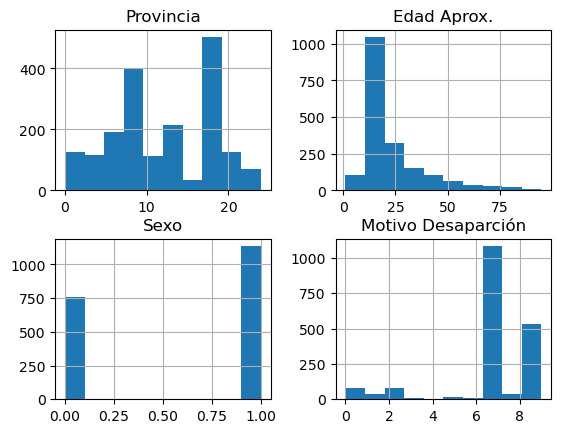

In [260]:
datosNew.hist()

In [261]:
X = datosNew.drop(['Motivo Desaparción'], axis=1)
y = datosNew['Motivo Desaparción']
X

,Provincia,Edad Aprox.,Sexo
0,18,17,0
1,18,17,1
2,20,39,0
3,18,14,1
4,7,28,0
...,...,...,...
1887,20,14,1
1888,0,15,1
1889,4,22,0
1890,9,32,0


In [262]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from numpy import where 

sm = SMOTE(k_neighbors=4) # vecinos más cercanos k_neighbors=4

X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset %s ' % Counter(y_res))

Resampled dataset Counter({7: 1083, 9: 1083, 8: 1083, 0: 1083, 1: 1083, 5: 1083, 2: 1083, 6: 1083, 4: 1083, 3: 1083}) 


array([[<Axes: title={'center': 'Motivo Desaparción'}>]], dtype=object)

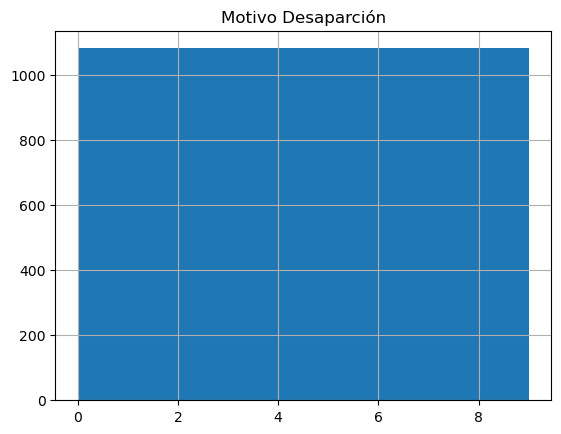

In [263]:
df = pd.DataFrame(y_res)
df.hist()

In [264]:
datosNew

,Provincia,Edad Aprox.,Sexo,Motivo Desaparción
0,18,17,0,7
1,18,17,1,7
2,20,39,0,7
3,18,14,1,9
4,7,28,0,7
...,...,...,...,...
1887,20,14,1,7
1888,0,15,1,7
1889,4,22,0,9
1890,9,32,0,7


In [265]:
df

,Motivo Desaparción
0,7
1,7
2,7
3,9
4,7
...,...
10825,9
10826,9
10827,9
10828,9


**4) Suba nuevo archivo generado con SMOTE al eva y el archivo utlizado para realizar el taller**

In [266]:
md_levels_inv = {v: k for k, v in md_levels.items()}
df['Motivo Desaparción'] = df['Motivo Desaparción'].map(md_levels_inv)


In [267]:
df

,Motivo Desaparción
0,PROBLEMAS FAMILIARES
1,PROBLEMAS FAMILIARES
2,PROBLEMAS FAMILIARES
3,PROBLEMAS SOCIALES
4,PROBLEMAS FAMILIARES
...,...
10825,PROBLEMAS SOCIALES
10826,PROBLEMAS SOCIALES
10827,PROBLEMAS SOCIALES
10828,PROBLEMAS SOCIALES


In [270]:
import csv as csv
df.to_csv('tabla.csv')

In [271]:
df

,Motivo Desaparción
0,PROBLEMAS FAMILIARES
1,PROBLEMAS FAMILIARES
2,PROBLEMAS FAMILIARES
3,PROBLEMAS SOCIALES
4,PROBLEMAS FAMILIARES
...,...
10825,PROBLEMAS SOCIALES
10826,PROBLEMAS SOCIALES
10827,PROBLEMAS SOCIALES
10828,PROBLEMAS SOCIALES
